### Import stock listing info from the NASDAQ
In this video, you learned how to use the pd.read_csv() function to import data from a csv file containing companies listed on the AmEx Stock Exchange into a pandas DataFrame. You can apply this same knowledge to import listing information in csv files from other stock exchanges.

The next step is to ensure that the contents of the DataFrame accurately reflect the meaning of your data. Two essential methods to understand your data are .head(), which displays the first five rows of your data by default, and .info(), which summarizes elements of a DataFrame such as content, data types, and missing values.

In this exercise, you will read the file nasdaq-listings.csv with data on companies listed on the NASDAQ and then diagnose issues with the imported data. You will fix these issues in the next exercise.

In [1]:
# Import pandas library
import pandas as pd

# Import the data
nasdaq = pd.read_csv('NasdaqListings.csv', parse_dates=['Last Update'])

# Display first 10 rows
print(nasdaq.head(10))

# Inspect nasdaq
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   
5           FB         Facebook, Inc.     139.39           4.030000e+11   
6        CMCSA    Comcast Corporation      37.14           1.760000e+11   
7         INTC      Intel Corporation      35.25           1.660000e+11   
8         CSCO    Cisco Systems, Inc.      32.42           1.620000e+11   
9         AMGN             Amgen Inc.     161.61           1.190000e+11   

  IPO Year             Sector  \
0     1980         Technology   
1      NAN         Technology   
2     2004         Technology   
3     1986         Technology   
4     199

### How to fix the data import?
Two optional arguments that you can add to .read_csv() to better represent the data from an external file are:

na_values: Converts a given string to np.nan, defaults to None
parse_dates: Reads the data in a list of given columns as dtype datetime64, defaults to False
Which of the following steps should you take to make sure that the data imported from nasdaq-listings.csv are accurately represented?


In [3]:
# Import pandas library
import pandas as pd

# Import the data
nasdaq = pd.read_csv('NasdaqListings.csv', parse_dates=['Last Update'], na_values=['NAN'])

# Display first 10 rows
print(nasdaq.head(10))

# Inspect nasdaq
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   
5           FB         Facebook, Inc.     139.39           4.030000e+11   
6        CMCSA    Comcast Corporation      37.14           1.760000e+11   
7         INTC      Intel Corporation      35.25           1.660000e+11   
8         CSCO    Cisco Systems, Inc.      32.42           1.620000e+11   
9         AMGN             Amgen Inc.     161.61           1.190000e+11   

   IPO Year             Sector  \
0    1980.0         Technology   
1       NaN         Technology   
2    2004.0         Technology   
3    1986.0         Technology   
4   

### Load listing info from a single sheet
As you just learned, you can import data from a sheet of an Excel file with the pd.read_excel() function by assigning the optional sheet_name argument to an integer indicating its position or a string containing its name.

pandas.read_excel(file, sheetname=0, na_values=None, ...)
Here, you will practice by importing NYSE data from a new file, listings.xlsx. pandas has been imported as pd.

In [4]:
# Import the data
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')

# Display the head of the data
print(nyse.head())

# Inspect the data
nyse.info()

  Stock Symbol            Company Name  Last Sale  Market Capitalization  \
0          DDD  3D Systems Corporation      14.48           1.647165e+09   
1          MMM              3M Company     188.65           1.127366e+11   
2         WBAI         500.com Limited      13.96           5.793129e+08   
3         WUBA             58.com Inc.      36.11           5.225238e+09   
4          AHC   A.H. Belo Corporation       6.20           1.347351e+08   

   IPO Year             Sector  \
0       NaN         Technology   
1       NaN        Health Care   
2    2013.0  Consumer Services   
3    2013.0         Technology   
4       NaN  Consumer Services   

                                          Industry  
0          Computer Software: Prepackaged Software  
1                       Medical/Dental Instruments  
2            Services-Misc. Amusement & Recreation  
3  Computer Software: Programming, Data Processing  
4                             Newspapers/Magazines  
<class 'pandas.core.

### Load listing data from two sheets
The import process is just as intuitive when using the sheet_names attribute of a pd.ExcelFile() object.

Passing in a list as the sheetname argument of pd.read_excel(), whether you assign the list to a variable holding the sheet_names attribute of a pd.ExcelFile() object or type the list out yourself, constructs a dictionary. In this dictionary, the keys are the names of the sheets, and the values are the DataFrames containing the data from the corresponding sheet. You can extract values from a dictionary by providing a particular key in brackets.

In this exercise, you will retrieve the list of stock exchanges from listings.xlsx and then use this list to read the data for all three exchanges into a dictionary. pandas has been imported as pd.

In [6]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheet_name=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


### Load all listing data and iterate over key-value dictionary pairs
You already know that a pd.DataFrame() object is a two-dimensional labeled data structure. As you saw in the video, the pd.concat() function is used to concatenate, or vertically combine, two or more DataFrames. You can also use broadcasting to add new columns to DataFrames.

In this exercise, you will practice using this new pandas function with the data from the NYSE and NASDAQ exchanges. pandas has been imported as pd.

In [7]:
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


In [ ]:
# https://cloud.iexapis.com/stable/stock/IBM/financials?token=pk_ec51fea394de452c97ccc9cfd2859df4&period=annual 

### Visualize the long-term gold price trend
In the previous video, you learned how to retrieve data from the Federal Reserve Economic Data (FRED) portal.

Here, you will use this new data source to visualize the gold price trend over the last 50 years, specifically, the Gold Fixing Price 10:30 AM (London time) in London Bullion Market, in US Dollars. DataReader, date, pandas as pd, and matplotlib.pyplot as plt have been imported.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13668 entries, 1968-04-01 to 2020-08-19
Data columns (total 1 columns):
GOLDAMGBD228NLBM    13245 non-null float64
dtypes: float64(1)
memory usage: 213.6 KB


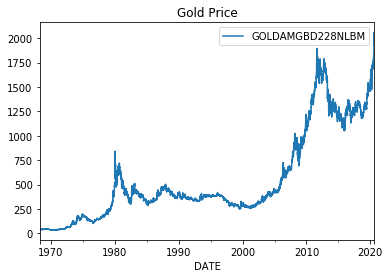

In [15]:
from pandas_datareader.data import DataReader
from datetime import date # Date & time functionality
import matplotlib.pyplot as plt
# Set start date
start = date(1968, 1, 1)

# Set series code
series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()

### Compare labor market participation and unemployment rates
Two economic data series in FRED are the Civilian Unemployment Rate ('UNRATE') and the Civilian Labor Force Participation Rate ('CIVPART').

These rates highlight two important aspects of the US labor market: the share of the civilian population that is currently unemployed or seeking employment, and the share of those active in the labor market that are in fact employed.

This means that the numbers indicate both the size of the labor market relative to the total population, as well as the size of unemployment relative to the labor market.

Here, you will import, modify, and plot the data. DataReader, date, pandas as pd, and matplotlib.pyplot as plt have been imported.

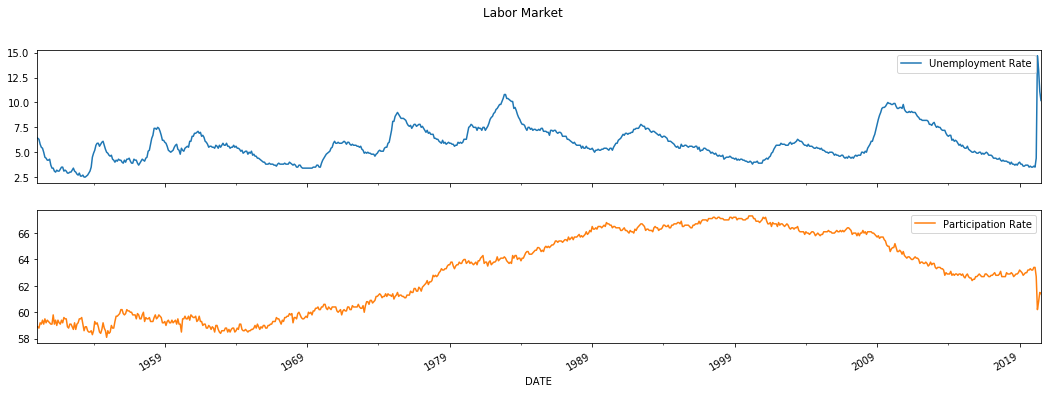

In [22]:
# Set the start date
start = date(1950, 1, 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market', figsize = (18, 6))

# Show the plot
plt.show()

### Compare bond and stock performance
Bonds and stocks are the most important investment alternatives. Now that you can import data from both the Federal Reserve and Google Finance, you can compare the performance of both asset classes. You'll be using a Total Return Index for each class, which accounts for returns due to both price increases and payments like interest or dividends.

For bonds, you'll use the Bank of America Merrill Lynch US High Yield Total Return Index Value ('BAMLHYH0A0HYM2TRIV'). For stocks, you'll use the S&P 500 Index ('SP500'). Both are available for the past 10 years from the Federal Reserve's FRED service.

In this exercise, you will download both series and compare their performance. DataReader, date, pandas as pd, and matplotlib.pyplot as plt have been imported.

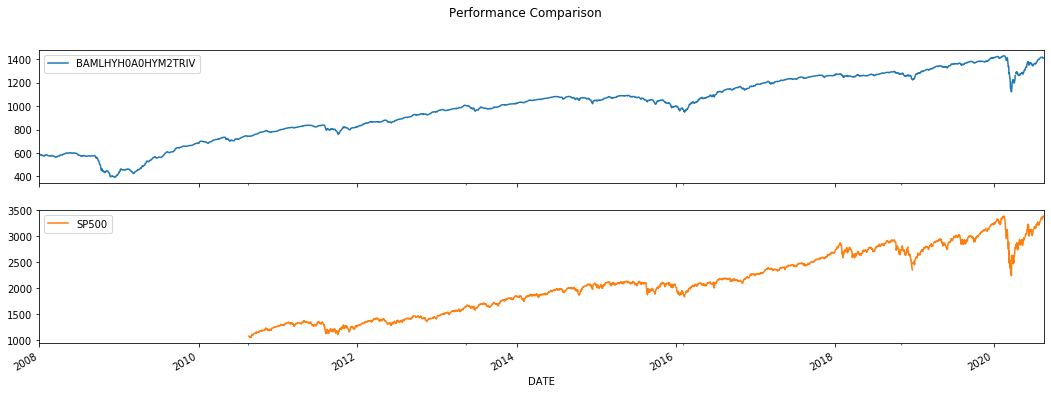

In [21]:
# Set the start date
start = date(2008, 1, 1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots=True, title='Performance Comparison', figsize = (18,6))

# Show the plot

plt.show()

### List the poorest and richest countries worldwide
The values of numerical variables are numbers. They can be described by measures of central tendency, or the most typical value in a dataset, and dispersion, which represents the spread of a distribution.

In the next few exercises, you will use these statistics to explore the data in 'per_capita_income.csv', which contains the average income earned per person in a given country. The first step in analyzing aspects of the global income distribution is to inspect and familiarize yourself with the data.

pandas has been imported as pd.

In [29]:
# Import the data
income = pd.read_csv('PerCapitaIncome.csv')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

# Display the first and last five rows
print(income.head())
print(income.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
Country              184 non-null object
Income per Capita    184 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
               Country  Income per Capita
133              Qatar       141542.66280
97    Macao SAR, China       111496.62940
96          Luxembourg       102051.68030
144          Singapore        85382.30227
23   Brunei Darussalam        78369.29102
                      Country  Income per Capita
121                     Niger         955.483324
94                    Liberia         835.366935
37           Congo, Dem. Rep.         784.365232
26                    Burundi         727.150789
31   Central African Republic         618.752859


### Global incomes: Central tendency
The most common measures of central tendency are the mean, which is equal to the sum of all values divided by the total number of values, median, which separates the upper half of data from the lower half, and mode, which is the most frequent value in the data set. The pandas package contains functions that can calculate each of these.

In this data set, the values for 'Income per Capita' are floats, and there are no repeat values, so running income['Income per Capita'].mode() in your console returns an empty series. Here, you will use the floor division operator // to add a new column that measures income in thousands, rounded down, so that a value such as 11,543.43 becomes just 11. Then, you will run the above functions to better understand how incomes are distributed.

pandas has been imported as pd, and the income DataFrame from the previous exercise is in your workspace.

In [30]:
# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

19469.41956573694
11620.932519999998


0    1.0
dtype: float64

### Global incomes: Dispersion
A quantile is a measure of dispersion created by dividing a frequency distribution of a DataFrame into even groups. You can return values at the given quantile q of a DataFrame df with the command df.quantile(q); likewise, supplying a list as q will return a value for each given quantile.

Here, you will continue your analysis of global income distribution using two measures of dispersion: the standard deviation, or square root of variance, and the interquartile range (IQR).

pandas has been imported as pd, and the income DataFrame from the previous exercise is in your workspace.

In [31]:
# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation 
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean - std, mean + std]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([.25, .75])
print(quantiles)

# Calculate and print IQR
iqr = quantiles[.75] - quantiles[.25]
print(iqr)

[-2497.441641469137, 41436.28077294301]
0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64
22636.39573


### Deciles of the global income distribution
A decile is a special kind of quantile obtained by dividing the distribution of a particular dataset by ten. Deciles (as well as any other kind of quantile) can be created by supplying the following numpy function to .quantile(), where start is the beginning of the interval (inclusive), stop is the end of the interval (exclusive), and step is the spacing between any two adjacent values:

np.arange(start, stop, step)
As you saw in the video, a standard bar graph is a great way to visualize the distribution of data. You can create one by adding kind='bar' as an argument to .plot().

Now it's your turn to apply this knowledge to plot a summary of the income distribution in deciles! pandas as pd, numpy as np, and matplotlib.pyplot as plt have been imported for you, and the income DataFrame from the previous exercise is available in your workspace.

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0.1     1805.906426
0.2     3177.255688
0.3     5506.323195
0.4     8510.729683
0.5    11620.932520
0.6    15790.369076
0.7    22563.075646
0.8    32517.693902
0.9    47377.886804
Name: Income per Capita, dtype: float64


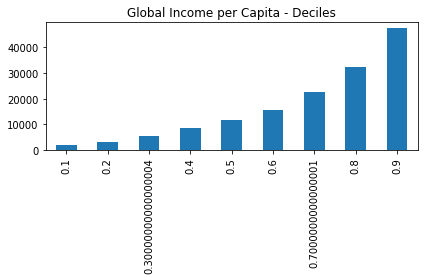

In [33]:
import numpy as np
# Generate range of deciles
quantiles = np.arange(.1, .91, .1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

### Getting all the statistics
You can retrieve all major central tendency, dispersion, and shape statistics of a distribution at once with the pandas .describe() method. The default value of its optional percentiles argument corresponds with quartiles, but you can supply your own list of percentiles, as instead:

DataFrame.describe(percentiles=[.25, .5, .75])
The outputs of .describe() also include the total number of entries in the given series (which can be calculated with .count()), minimum value in the series (which can be calculated with .min()), and maximum value in the series (which can be calculated with .max()).

pandas as pd and numpy as np have been imported for you, and the income DataFrame from the previous exercise is available in your workspace.

This exercise will test your knowledge of the metrics and functions covered so far. Which of the following statements regarding the data in the 'Income per Capita' column in income is FALSE?

### Visualizing international income distribution
seaborn is a Python visualization library for statistical data visualization based on matplotlib.

By default, the distplot() function in the seaborn package creates a histogram, where data is grouped into ranges and and plotted as bars, and fits a kernel density estimation (KDE), or smoothed histogram. You can also use distplot() to create another kind of graph called a rugplot, which adds markers at the bottom of the chart to indicate the density of observations along the x axis.

seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, ...)
In previous exercises, you created a quantile plot which provided a fairly granular sense of the level of income per capita at different points of the distribution. Here, you will use distplot() to get the full picture!

pandas has been imported as pd, and the income DataFrame from the previous exercise is available in your workspace.

       Income per Capita  Income per Capita (,000)
count         184.000000                184.000000
mean        19469.419566                 18.967391
std         21966.861207                 21.975869
min           618.752859                  0.000000
25%          3922.358940                  3.000000
50%         11620.932520                 11.000000
75%         26558.754670                 26.000000
max        141542.662800                141.000000


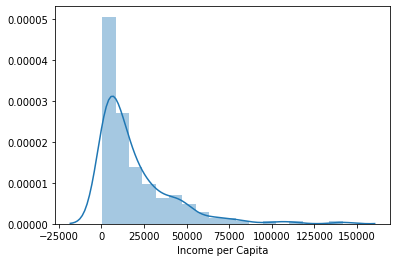

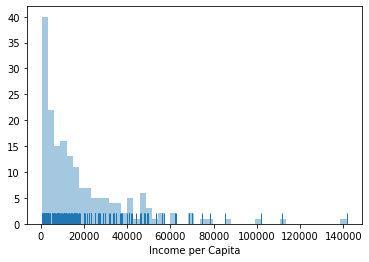

In [34]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Print the summary statistics for income
print(income.describe())

# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita'])

# Show the plot
plt.show()

# Plot a rugplot
sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

### Growth rates in Brazil, China, and the US
It's time to extend your analysis beyond the levels of international per capita income to the growth rates. The 'income_growth.csv' file contains the growth rates of per capita income over the last 40 years for Brazil, China, and the US.

You will plot the distribution of the historical growth rates for each country on the same chart using a KDE plot to faciliate visual comparison of the ranges of growth that these markets have experienced over this time period.

From this point in the course onwards, you should always inspect any DataFrame with .info() in your console even if this isn't explicitly in the instructions. pandas as pd, seaborn as sns, and matplotlib.pyplot as plt have been imported.

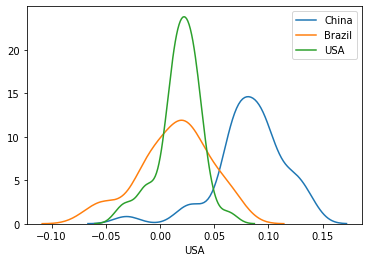

In [36]:
# Load the file into growth
growth = pd.read_csv('incomeGrowth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

# Iterate over the three columns
for column in growth.columns:
    sns.distplot(growth[column], hist=False, label=column)
    
# Show the plot
plt.show()

### Highlighting values in the distribution
Sometimes it is necessary to manipulate your data in order to create a better visualization. Two methods that can take care of missing values are .dropna() and .fillna(). You can also remove outliers by filtering entries that are over or under a certain percentile by applying a condition using .quantile() to a particular column.

You also saw in the video how to emphasize a particular value in a plot by adding a vertical line at position x across the axes:

Axes.axvline(x=0, color=None, ...)
In this exercise, you will take a final look at global income distribution, and then remove outliers above the 95th percentile, plot the distribution, and highlight both the mean and median values. pandas as pd, seaborn as sns, and matplotlib.pyplot as plt have been imported, and the income DataFrame from previous exercises is available in your workspace.

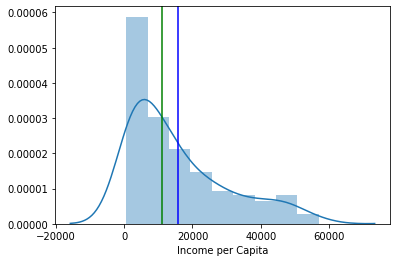

In [38]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(.95)]

# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()